In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, GridSearchCV, validation_curve

In [2]:
data1 = pd.read_csv("datasets/pulsar/pulsar_stars.csv", dtype=np.float32)
Y1 = np.array(data1.pop("target_class"))
X1 = np.array(data1)

data2 = pd.read_csv("datasets/mobile/train.csv")
Y2 = np.array(data2.pop("price_range"))
X2 = np.array(data2.copy())

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

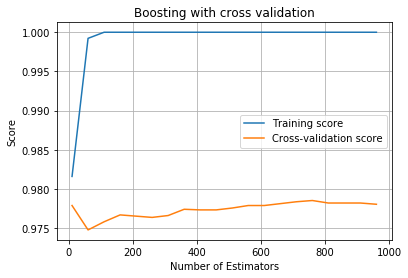

In [29]:
max_trees = 1000
seed = 0
n_cv = 5

dt = DecisionTreeClassifier(max_depth=3)
boost = AdaBoostClassifier(base_estimator=dt, random_state=seed)
num_estimators = np.arange(10,max_trees+1, 50)
train_scores, test_scores = validation_curve(boost, x_train_norm, y_train, param_name="n_estimators", param_range=num_estimators, cv=n_cv, n_jobs=-1)

plt.figure()
plt.plot(num_estimators, np.mean(train_scores, axis=1), label='Training score')
plt.plot(num_estimators, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Boosting with cross validation')
plt.xlabel('Number of Estimators')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


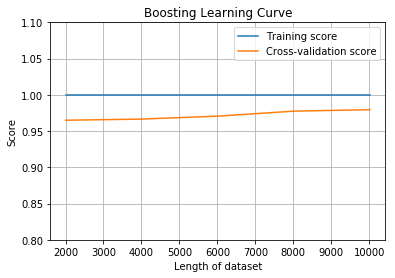

In [39]:
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6)
boost = AdaBoostClassifier(base_estimator=dt, random_state=seed)
parameters = {'n_estimators' : num_estimators}

clf = GridSearchCV(boost, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for Boosting:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Boosting with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('ROC score of Boosting with best parameters is %.2f%%' % (roc_auc_score(y_test, y_pred) * 100))
print('F1 score of Boosting with best parameters is %.2f%%' % (f1_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
boost = AdaBoostClassifier(base_estimator=dt, n_estimators = clf.best_params_['n_estimators'], random_state=seed)
train_sizes, train_scores, test_scores = learning_curve(boost, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes, n_jobs = -1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("Boosting Learning Curve")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.ylim(0.8, 1.1)
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Text(0.5, 0, 'False Positive Rate')

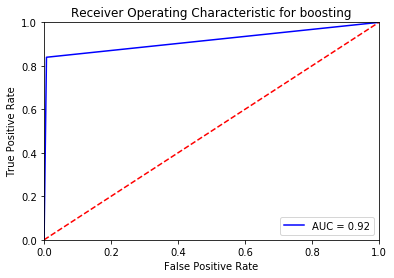

In [33]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [51]:
#Mobile dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

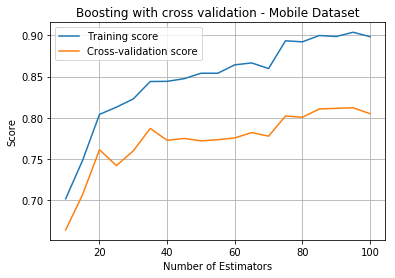

In [41]:
max_trees = 100
seed = 0
n_cv = 5

dt = DecisionTreeClassifier(max_depth=3)
boost = AdaBoostClassifier(base_estimator=dt, random_state=seed)
num_estimators = np.arange(10,max_trees+1, 5)
train_scores, test_scores = validation_curve(boost, x_train_norm, y_train, param_name="n_estimators", param_range=num_estimators, cv=n_cv, n_jobs=-1)

plt.figure()
plt.plot(num_estimators, np.mean(train_scores, axis=1), label='Training score')
plt.plot(num_estimators, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Boosting with cross validation - Mobile Dataset')
plt.xlabel('Number of Estimators')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


Best parameters for Boosting:
{'n_estimators': 10}
Accuracy score of Boosting with best parameters is 81.17%


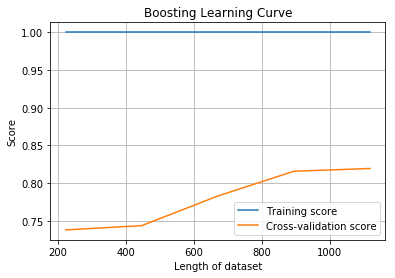

In [43]:
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6)
boost = AdaBoostClassifier(base_estimator=dt, random_state=seed)
parameters = {'n_estimators' : num_estimators}

clf = GridSearchCV(boost, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for Boosting:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Boosting with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
boost = AdaBoostClassifier(base_estimator=dt, n_estimators = clf.best_params_['n_estimators'], random_state=seed)
train_sizes, train_scores, test_scores = learning_curve(boost, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes, n_jobs = -1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("Boosting Learning Curve")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Confusion matrix, without normalization
[[122  19   0   0]
 [ 16 108  22   0]
 [  0  18 118  29]
 [  0   1   8 139]]


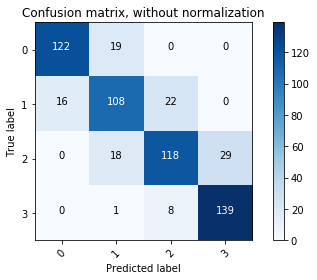

In [44]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6, max_depth = 3)

boost = AdaBoostClassifier(base_estimator=dt, n_estimators = 360, random_state=seed)

%timeit boost.fit(x_train_norm, y_train)

%timeit boost.predict(x_train_norm)

10.2 s ± 72.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
462 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6, max_depth = 3)

boost = AdaBoostClassifier(base_estimator=dt, n_estimators = 10, random_state=seed)

%timeit boost.fit(x_train_norm, y_train)

%timeit boost.predict(x_train_norm)

34.5 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
